In [259]:
#%display plain
%display latex

In [2]:
from matplotlib import cm
import numpy as np
import itertools
from itertools import combinations
from __future__ import print_function

In [3]:
real_vars = var('r,t,theta,phi,x,y,z')
for rv in real_vars:
    assume(rv, 'real')
    
    
xs = var(['x{}'.format(n) for n in range(5)])
for xi in xs: assume(xi,'real')

ys = var(['y{}'.format(n) for n in range(4)])
for yi in ys: assume(yi,'real')
    
    
p1 = sum([xi   for xi in xs])
p2 = sum([xi^2 for xi in xs])
p3 = sum([xi^3 for xi in xs])
p4 = sum([xi^4 for xi in xs])
p5 = sum([xi^5 for xi in xs])

    
e1 = sum([ xi             for (xi,           ) in combinations(xs,1)])
e2 = sum([ xi*xj          for (xi,xj         ) in combinations(xs,2)])
e3 = sum([ xi*xj*xk       for (xi,xj,xk      ) in combinations(xs,3)])
e4 = sum([ xi*xj*xk*xl    for (xi,xj,xk,xl   ) in combinations(xs,4)])    
e5 = sum([ xi*xj*xk*xl*xm for (xi,xj,xk,xl,xm) in combinations(xs,5)])

In [4]:
com = vector([1,1,1,1,1])/sqrt(5) # center of mass

j1 = vector(QQ,[1,0,0,0,0])
j2 = vector(QQ,[0,1,0,0,0])
j3 = vector(QQ,[0,0,1,0,0])
j4 = vector(QQ,[0,0,0,1,0])

j1 = j1 - (j1*com)*com/com.norm()^2
j2 = j2 - (j2*com)*com/com.norm()^2
j3 = j3 - (j3*com)*com/com.norm()^2
j4 = j4 - (j4*com)*com/com.norm()^2

j2 = j2 - (j2*j1)*j1/j1.norm()^2
j3 = j3 - (j3*j1)*j1/j1.norm()^2
j4 = j4 - (j4*j1)*j1/j1.norm()^2

j3 = j3 - (j3*j2)*j2/j2.norm()^2
j4 = j4 - (j4*j2)*j2/j2.norm()^2

j4 = j4 - (j4*j3)*j3/j3.norm()^2

j1 = j1/j1.norm()
j2 = j2/j2.norm()
j3 = j3/j3.norm()
j4 = j4/j4.norm()

matrix([j1, j2, j3, j4]).transpose() # display as column vecs

[   2*sqrt(1/5)              0              0              0]
[-1/2*sqrt(1/5)    1/2*sqrt(3)              0              0]
[-1/2*sqrt(1/5)   -1/6*sqrt(3)      sqrt(2/3)              0]
[-1/2*sqrt(1/5)   -1/6*sqrt(3) -1/2*sqrt(2/3)      sqrt(1/2)]
[-1/2*sqrt(1/5)   -1/6*sqrt(3) -1/2*sqrt(2/3)     -sqrt(1/2)]

In [5]:
Pm = matrix([com,j1,j2,j3,j4]).transpose()

Pl = matrix([j1,j2,j3,j4]).transpose()

Qm = matrix([[0,0,0,0],
             [1,0,0,0],
             [0,1,0,0],
             [0,0,1,0],
             [0,0,0,1]])

In [6]:
# the (5 choose 3) 3-body interations in 4 dimensions
three_coincidences = [ matrix([[1,1,1,1,1],[1,-1, 0, 0,0],[0,1,-1, 0, 0]]),
                       matrix([[1,1,1,1,1],[1,-1, 0, 0,0],[0,1, 0,-1, 0]]),
                       matrix([[1,1,1,1,1],[1,-1, 0, 0,0],[0,1, 0, 0,-1]]),
                       matrix([[1,1,1,1,1],[1, 0,-1, 0,0],[0,0, 1,-1, 0]]),
                       matrix([[1,1,1,1,1],[1, 0,-1, 0,0],[0,0, 1, 0,-1]]),
                       matrix([[1,1,1,1,1],[1, 0, 0,-1,0],[0,0, 0, 1,-1]]),
                       matrix([[1,1,1,1,1],[0, 1,-1, 0,0],[0,0, 1,-1, 0]]),
                       matrix([[1,1,1,1,1],[0, 1,-1, 0,0],[0,0, 1, 0,-1]]),
                       matrix([[1,1,1,1,1],[0, 1, 0,-1,0],[0,0, 0, 1,-1]]),
                       matrix([[1,1,1,1,1],[0, 0, 1,-1,0],[0,0, 0, 1,-1]]) ]

three_body_4d = [ (M*Pl).right_kernel().basis_matrix() for M in three_coincidences ]
three_body_4d = [ (M[0]/M[0].norm(),M[1]/M[1].norm()) for M in three_body_4d ]

# the (5 choose 4) 4-body interations in 4 dimensions
four_coincidences = [ matrix([[ 1, 1, 1, 1, 1],
                              [ 1,-1, 0, 0, 0],
                              [ 0, 1,-1, 0, 0],
                              [ 0, 0, 1,-1, 0]]),
                      matrix([[ 1, 1, 1, 1, 1],
                              [ 1,-1, 0, 0, 0],
                              [ 0, 1,-1, 0, 0],
                              [ 0, 0, 1, 0,-1]]),
                      matrix([[ 1, 1, 1, 1, 1],
                              [ 1,-1, 0, 0, 0],
                              [ 0, 1, 0,-1, 0],
                              [ 0, 0, 0, 1,-1]]),
                      matrix([[ 1, 1, 1, 1, 1],
                              [ 1, 0,-1, 0, 0],
                              [ 0, 0, 1,-1, 0],
                              [ 0, 0, 0, 1,-1]]),
                      matrix([[ 1, 1, 1, 1, 1],
                              [ 0, 1,-1, 0, 0],
                              [ 0, 0, 1,-1, 0],
                              [ 0, 0, 0, 1,-1]]) ]
four_body_4d = [ (M*Pl).right_kernel().basis_matrix()[0] for M in four_coincidences ]
four_body_4d = [ (v/v.norm()).simplify_full() for v in four_body_4d ]

In [7]:
# the (5 choose 3) 3-body interations in 5 dimensions 
# (there is another dimension for each, in the "total coincidence" direction)

three_body_5d = [ M.right_kernel().basis_matrix() for M in three_coincidences ]
three_body_5d = [ ((M[0]/M[0].norm()).simplify_full(),(M[1]/M[1].norm()).simplify_full()) for M in three_body_5d ]

four_body_5d = [ M.right_kernel().basis_matrix()[0] for M in four_coincidences ]
four_body_5d = [ (v/v.norm()).simplify_full() for v in four_body_5d ]



In [8]:
f1 = e1(*(Pm*Qm*vector(ys))).simplify_full().expand()
f2 = e2(*(Pm*Qm*vector(ys))).simplify_full().expand()
f3 = e3(*(Pm*Qm*vector(ys))).simplify_full().expand()
f4 = e4(*(Pm*Qm*vector(ys))).simplify_full().expand()
f5 = e5(*(Pm*Qm*vector(ys))).simplify_full().expand()

pretty_print(f1)
pretty_print(f2)
pretty_print(f3)
pretty_print(f4)
pretty_print(f5)

0

-1/2*y0^2 - 1/2*y1^2 - 1/2*y2^2 - 1/2*y3^2

1/18*sqrt(3)*sqrt(2)*y2^3 - 1/6*sqrt(3)*sqrt(2)*y2*y3^2 + 1/10*sqrt(5)*y0^3 - 1/10*sqrt(5)*y0*y1^2 + 1/9*sqrt(3)*y1^3 - 1/10*sqrt(5)*y0*y2^2 - 1/6*sqrt(3)*y1*y2^2 - 1/10*sqrt(5)*y0*y3^2 - 1/6*sqrt(3)*y1*y3^2

1/60*sqrt(5)*sqrt(3)*sqrt(2)*y0*y2^3 - 1/20*sqrt(5)*sqrt(3)*sqrt(2)*y0*y2*y3^2 + 1/30*sqrt(5)*sqrt(3)*y0*y1^3 - 1/20*sqrt(5)*sqrt(3)*y0*y1*y2^2 - 1/20*sqrt(5)*sqrt(3)*y0*y1*y3^2 + 1/12*sqrt(2)*y1*y2^3 - 1/4*sqrt(2)*y1*y2*y3^2 - 3/80*y0^4 + 7/40*y0^2*y1^2 - 1/48*y1^4 + 7/40*y0^2*y2^2 + 1/8*y1^2*y2^2 + 7/40*y0^2*y3^2 + 1/8*y1^2*y3^2

-1/90*sqrt(3)*sqrt(2)*y0^2*y2^3 + 1/30*sqrt(5)*sqrt(2)*y0*y1*y2^3 + 1/30*sqrt(3)*sqrt(2)*y0^2*y2*y3^2 - 1/10*sqrt(5)*sqrt(2)*y0*y1*y2*y3^2 + 1/1000*sqrt(5)*y0^5 - 1/100*sqrt(5)*y0^3*y1^2 - 1/45*sqrt(3)*y0^2*y1^3 - 1/120*sqrt(5)*y0*y1^4 - 1/100*sqrt(5)*y0^3*y2^2 + 1/30*sqrt(3)*y0^2*y1*y2^2 + 1/20*sqrt(5)*y0*y1^2*y2^2 - 1/100*sqrt(5)*y0^3*y3^2 + 1/30*sqrt(3)*y0^2*y1*y3^2 + 1/20*sqrt(5)*y0*y1^2*y3^2

In [50]:
def stereographic_proj(v):
    """ Standard Stereographic projection from S^3 to R^3"""
    w = vector(v)
    #return (w[0]/(1-w[3]),w[1]/(1-w[3]), w[2]/(1-w[3]))
    #return (w[0]/(1-w[2]),w[1]/(1-w[2]), w[3]/(1-w[2]))
    return (w[0]/(1-w[1]),w[2]/(1-w[1]), w[3]/(1-w[1]))
    #return (w[1]/(1-w[0]),w[2]/(1-w[0]), w[3]/(1-w[0]))

#def to_iso_spherical_coords(v):
#    x, y, z = v
#    r = sqrt(x^2+y^2+z^2)
#    theta = arccos(z/r)
#    phi = atan2(y,x)
#    return (r,theta,phi)

#def to_iso_sphere_coords(v):
#    r, theta, phi = to_iso_spherical_coords(v)
#    return (phi, theta) #(theta, phi)

In [51]:
P_threecurves = Graphics()

num_curves = len(three_body_4d)

for curve_num, (wi, wj) in enumerate(three_body_4d):
    three_curve = stereographic_proj(cos(t)*wi+sin(t)*wj)
    #three_curve = three_curve/three_curve.norm()
    if curve_num != num_curves-1:
        P_threecurves += parametric_plot3d(three_curve,
                                           (t,0,2*pi),
                                           thickness=4,
                                           color=rainbow(num_curves)[curve_num])
    else:
        P_threecurves += parametric_plot3d(three_curve,
                                           (t,-pi*1.25,pi/3),
                                           thickness=4,
                                           color=rainbow(num_curves)[curve_num])
        
for wi in four_body_4d:
    pt = stereographic_proj(wi)
    P_threecurves += point3d(pt, color='black', size=20)
    pt = stereographic_proj(-wi)
    P_threecurves += point3d(pt, color='black', size=20)
    
P_threecurves.show(viewer='threejs', aspect_ratio=1)

Graphics3d Object

In [52]:
def lap(f,vrs):
    return sum([diff(f,vi,2) for vi in vrs])

In [62]:
es = [0,e1,e2,e3,e4,e5]

[lap(e,xs) for e in es]

[0, 0, 0, 0, 0, 0]

In [63]:
fs = [0,f1,f2,f3,f4,f5]

[lap(f,ys) for f in fs]

[0,
 0,
 -4,
 0,
 3/5*y0^2 + 3/5*y1^2 + 3/5*y2^2 + 3/5*y3^2,
 -1/45*sqrt(3)*sqrt(2)*y2^3 + 1/15*sqrt(3)*sqrt(2)*y2*y3^2 - 1/25*sqrt(5)*y0^3 + 1/25*sqrt(5)*y0*y1^2 - 2/45*sqrt(3)*y1^3 + 1/25*sqrt(5)*y0*y2^2 + 1/15*sqrt(3)*y1*y2^2 + 1/25*sqrt(5)*y0*y3^2 + 1/15*sqrt(3)*y1*y3^2]

In [64]:
def rep_lap(f,k,vrs):
    if k <= 0:
        return f
    elif k == 1:
        return lap(f,vrs)
    else:
        return lap(rep_lap(f,k-1,vrs),vrs)
    
def semi_factorial(n):
    if n <= 1:
        return 1
    else:
        return n*semi_factorial(n-2)
    
def harmonic_leading_term(f,n,vrs):
    r_sq = sum([vi^2 for vi in vrs])
    d = len(vrs)
    return sum([ ((-1)^k)*semi_factorial(d+2*n-2*k-4) \
                / ( semi_factorial(2*k) * semi_factorial(d+2*n-4) ) \
                * (r_sq^k) * rep_lap(f,k,vrs) for k in range(floor(n/2)+1)])

In [71]:
gs = [harmonic_leading_term(fs[i],i,ys).expand() for i in range(len(fs))]

map( lambda g: lap(g,ys), gs)

[0, 0, 0, 0, 0, 0]

In [75]:
def inner_product(f,g,vrs):
    ip = (f.conjugate()*g).expand()*exp(-sum([vi^2 for vi in vrs]))/(2*pi)^len(vrs)
    # odd parts will integrate out, so remove them. makes this go quite a bit faster
    for vi in vrs:
        ip = ((ip+ip(vi=-vi))/2).simplify_full()
    for vi in vrs:
        ip = integrate(ip,vi,-oo,oo)
    return ip

In [80]:
normed_gs = []
for g in gs:
    norm_sq = inner_product(g,g,ys).expand().simplify_full()
    if norm_sq != 0:
        normed_gs.append((g/sqrt(norm_sq)).expand())
    else:
        normed_gs.append(0)

In [206]:
for g in normed_gs:
    pretty_print(g)

0

0

0

10/9*sqrt(3)*sqrt(2)*sqrt(1/5)*pi*y2^3 - 10/3*sqrt(3)*sqrt(2)*sqrt(1/5)*pi*y2*y3^2 + 2*sqrt(5)*sqrt(1/5)*pi*y0^3 - 2*sqrt(5)*sqrt(1/5)*pi*y0*y1^2 + 20/9*sqrt(3)*sqrt(1/5)*pi*y1^3 - 2*sqrt(5)*sqrt(1/5)*pi*y0*y2^2 - 10/3*sqrt(3)*sqrt(1/5)*pi*y1*y2^2 - 2*sqrt(5)*sqrt(1/5)*pi*y0*y3^2 - 10/3*sqrt(3)*sqrt(1/5)*pi*y1*y3^2

4/9*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi*y0*y2^3 - 4/3*sqrt(5)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi*y0*y2*y3^2 + 8/9*sqrt(5)*sqrt(3)*sqrt(3/10)*pi*y0*y1^3 - 4/3*sqrt(5)*sqrt(3)*sqrt(3/10)*pi*y0*y1*y2^2 - 4/3*sqrt(5)*sqrt(3)*sqrt(3/10)*pi*y0*y1*y3^2 + 20/9*sqrt(2)*sqrt(3/10)*pi*y1*y2^3 - 20/3*sqrt(2)*sqrt(3/10)*pi*y1*y2*y3^2 - 5/3*sqrt(3/10)*pi*y0^4 + 10/3*sqrt(3/10)*pi*y0^2*y1^2 - 11/9*sqrt(3/10)*pi*y1^4 + 10/3*sqrt(3/10)*pi*y0^2*y2^2 + 2*sqrt(3/10)*pi*y1^2*y2^2 - 2/3*sqrt(3/10)*pi*y2^4 + 10/3*sqrt(3/10)*pi*y0^2*y3^2 + 2*sqrt(3/10)*pi*y1^2*y3^2 - 4/3*sqrt(3/10)*pi*y2^2*y3^2 - 2/3*sqrt(3/10)*pi*y3^4

-1/3*sqrt(3)*sqrt(2)*pi*y0^2*y2^3 + 10/9*sqrt(5)*sqrt(2)*pi*y0*y1*y2^3 + 1/27*sqrt(3)*sqrt(2)*pi*y1^2*y2^3 + 1/27*sqrt(3)*sqrt(2)*pi*y2^5 + sqrt(3)*sqrt(2)*pi*y0^2*y2*y3^2 - 10/3*sqrt(5)*sqrt(2)*pi*y0*y1*y2*y3^2 - 1/9*sqrt(3)*sqrt(2)*pi*y1^2*y2*y3^2 - 2/27*sqrt(3)*sqrt(2)*pi*y2^3*y3^2 - 1/9*sqrt(3)*sqrt(2)*pi*y2*y3^4 + 1/10*sqrt(5)*pi*y0^5 - 1/3*sqrt(5)*pi*y0^3*y1^2 - 2/3*sqrt(3)*pi*y0^2*y1^3 - 31/90*sqrt(5)*pi*y0*y1^4 + 2/27*sqrt(3)*pi*y1^5 - 1/3*sqrt(5)*pi*y0^3*y2^2 + sqrt(3)*pi*y0^2*y1*y2^2 + 23/15*sqrt(5)*pi*y0*y1^2*y2^2 - 1/27*sqrt(3)*pi*y1^3*y2^2 - 1/15*sqrt(5)*pi*y0*y2^4 - 1/9*sqrt(3)*pi*y1*y2^4 - 1/3*sqrt(5)*pi*y0^3*y3^2 + sqrt(3)*pi*y0^2*y1*y3^2 + 23/15*sqrt(5)*pi*y0*y1^2*y3^2 - 1/27*sqrt(3)*pi*y1^3*y3^2 - 2/15*sqrt(5)*pi*y0*y2^2*y3^2 - 2/9*sqrt(3)*pi*y1*y2^2*y3^2 - 1/15*sqrt(5)*pi*y0*y3^4 - 1/9*sqrt(3)*pi*y1*y3^4

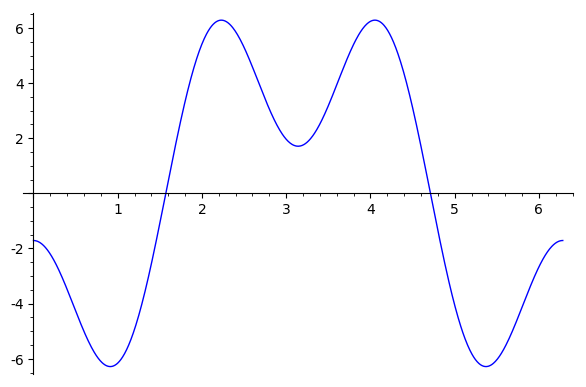

t |--> 4/9*sqrt(6)*pi*cos(3*t) - 2/3*sqrt(6)*pi*cos(t)

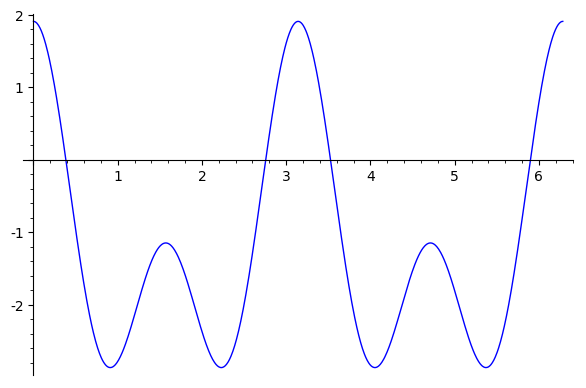

t |--> 4/45*sqrt(10)*sqrt(3)*pi*cos(4*t) + 4/45*sqrt(10)*sqrt(3)*pi*cos(2*t) - 1/15*sqrt(10)*sqrt(3)*pi

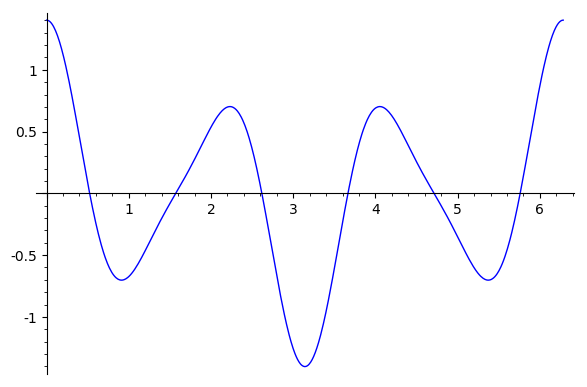

t |--> 2/135*sqrt(6)*sqrt(5)*pi*cos(5*t) + 7/135*sqrt(6)*sqrt(5)*pi*cos(3*t) + 2/135*sqrt(6)*sqrt(5)*pi*cos(t)

In [207]:
tbc_a, tbc_b = three_body_4d[0]

tbc = cos(t)*vector(SR,tbc_a) + sin(t)*vector(SR,tbc_b)

fourier_ts = [0,0,0]

for g in normed_gs[3:]:
    f(t) = g(*tbc).simplify_full().reduce_trig().expand()
    plot( f, (t,0,2*pi)).show()
    pretty_print(f)
    fourier_ts.append( sum([integrate(f*cos(t*n), (t,0,2*pi))*(z^n)/(2*pi) for n in range(-5,6)]) -  integrate(f, (t,0,2*pi))/(2*pi) )
        

## Facts:

product of functions leads to convolutions of their Fourier series

when the Fourier series are discrete, "convolution" means multiplication as polynomials


In [208]:
(fourier_ts[3]^2).expand()

8/27*pi^2*z^6 - 8/9*pi^2*z^4 - 2/9*pi^2*z^2 + 52/27*pi^2 - 2/9*pi^2/z^2 - 8/9*pi^2/z^4 + 8/27*pi^2/z^6

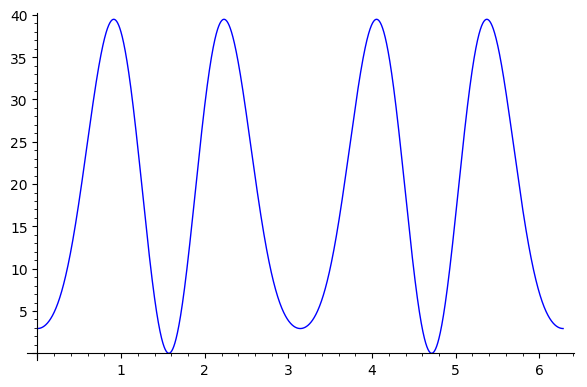

t |--> 16/27*pi^2*cos(6*t) - 16/9*pi^2*cos(4*t) - 4/9*pi^2*cos(2*t) + 52/27*pi^2

In [209]:
f(t) = (normed_gs[3]^2)(*tbc).simplify_full().reduce_trig().expand()
plot( f, (t,0,2*pi)).show()
pretty_print(f)

In [261]:
degree = 24

partitions = [ (i,j,k) for i,j,k in itertools.product(range(1+(degree//3)), range(1+(degree//4)), range(1+(degree//5))) if 3*i+4*j+5*k == degree ]

laur_ser_ft = [ (fourier_ts[3]^i * fourier_ts[4]^j * fourier_ts[5]^k).expand() for i,j,k in partitions ]

nvec = []
for laur_ser in laur_ser_ft:
    v = vector(SR,[0 for _ in range(2+2*degree)])
    for (c,d) in laur_ser.coefficients():
        if d < 0:
            v[1-2*d] = c
        else:
            v[2*d] = c
    nvec.append(v)
    
pretty_print(matrix(nvec).transpose())

50 x 8 dense matrix over Symbolic Ring (use the '.str()' method to see the entries)

In [262]:
matrix(nvec).transpose().rank()

7

In [263]:
ais = var(['a{}'.format(n) for n in range(len(nvec))])

solve( [ f == 0  for f in (matrix(nvec).transpose()*vector(ais))], ais)

[[a0 == -243/40*sqrt(10)*sqrt(3)*pi*r40, a1 == r40, a2 == -9/10*sqrt(5)*r40, a3 == -27/160*r40, a4 == -27/200*sqrt(5)*r40, a5 == -81/25600*sqrt(10)*sqrt(3)*r40/pi, a6 == 0, a7 == 0]]

In [264]:
v = vector([-243/40*sqrt(10)*sqrt(3)*pi,1, -9/10*sqrt(5), -27/160, -27/200*sqrt(5), -81/25600*sqrt(10)*sqrt(3)/pi, 0, 0])
pretty_print(v)
sol = vector([ (normed_gs[3]^i * normed_gs[4]^j * normed_gs[5]^k).expand() for i,j,k in partitions ]) * v

(-243/40*sqrt(10)*sqrt(3)*pi, 1, -9/10*sqrt(5), -27/160, -27/200*sqrt(5), -81/25600*sqrt(10)*sqrt(3)/pi, 0, 0)

In [265]:
matrix(nvec).transpose()*v

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# End Here

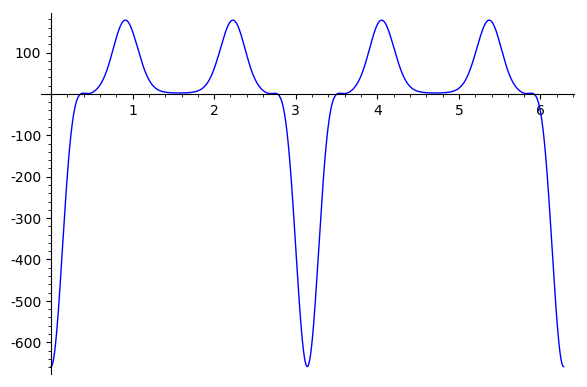

t |--> -16/10125*pi^6*cos(20*t) - 92/10125*pi^6*cos(18*t) - 533/30375*pi^6*cos(16*t) - 581/30375*pi^6*cos(14*t) - 842/18225*pi^6*cos(12*t) - 11093/121500*pi^6*cos(10*t) - 31337/486000*pi^6*cos(8*t) - 95299/1458000*pi^6*cos(6*t) - 182707/972000*pi^6*cos(4*t) - 3089/19440*pi^6*cos(2*t) - 22967/972000*pi^6

In [266]:
f(t) = (sol)(*tbc).simplify_full().reduce_trig().expand()
plot( f, (t,0,2*pi)).show()
pretty_print(f)

In [242]:
sol.expand()

-1191/4000*sqrt(10)*sqrt(5)*sqrt(2)*sqrt(3/10)*pi^6*y0^21*y2^3 + 81/100*sqrt(10)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi^6*y0^20*y1*y2^3 + 2583/800*sqrt(10)*sqrt(5)*sqrt(2)*sqrt(3/10)*pi^6*y0^19*y1^2*y2^3 - 2383/400*sqrt(10)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi^6*y0^18*y1^3*y2^3 - 13071/500*sqrt(10)*sqrt(5)*sqrt(2)*sqrt(3/10)*pi^6*y0^17*y1^4*y2^3 - 463/100*sqrt(10)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi^6*y0^16*y1^5*y2^3 + 338737/3000*sqrt(10)*sqrt(5)*sqrt(2)*sqrt(3/10)*pi^6*y0^15*y1^6*y2^3 + 63661/300*sqrt(10)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi^6*y0^14*y1^7*y2^3 - 627019/6000*sqrt(10)*sqrt(5)*sqrt(2)*sqrt(3/10)*pi^6*y0^13*y1^8*y2^3 - 1418408/2025*sqrt(10)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi^6*y0^12*y1^9*y2^3 - 79319/144*sqrt(10)*sqrt(5)*sqrt(2)*sqrt(3/10)*pi^6*y0^11*y1^10*y2^3 + 176317/1080*sqrt(10)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi^6*y0^10*y1^11*y2^3 + 958909/1080*sqrt(10)*sqrt(5)*sqrt(2)*sqrt(3/10)*pi^6*y0^9*y1^12*y2^3 + 843151/675*sqrt(10)*sqrt(3)*sqrt(2)*sqrt(3/10)*pi^6*y0^8*y1^13*y2^3 + 33302207/81000*sqrt(10)*sqrt(5)*s

In [171]:
nft[2].coefficients()

[[64/729*pi^4, -12],
 [-128/243*pi^4, -10],
 [160/243*pi^4, -8],
 [1120/729*pi^4, -6],
 [-284/81*pi^4, -4],
 [-80/81*pi^4, -2],
 [1352/243*pi^4, 0],
 [-80/81*pi^4, 2],
 [-284/81*pi^4, 4],
 [1120/729*pi^4, 6],
 [160/243*pi^4, 8],
 [-128/243*pi^4, 10],
 [64/729*pi^4, 12]]

In [ ]:
def legendre_poly(n):
    return diff( (x^2-1)^n, x, n)/(2^n*factorial(n))

def assoc_legendre_poly(m,l):
    if m >= 0:
        return (-1)^m * (1-x^2)^(m/2) *diff(legendre_poly(l),x,m)
    else:
        return (-1)^m * factorial(l-m) /factorial(l+m) * assoc_legendre_poly(-m,l)

def real_sh(m,l):
    return r^(l)*cos(m*phi)*assoc_legendre_poly(m,l)(x=cos(theta))

def imag_sh(m,l):
    return r^(l)*sin(m*phi)*assoc_legendre_poly(m,l)(x=cos(theta))

def polar_to_euclid(f):
    return ( f(theta=arccos(y2/r)) )(r=sqrt(y0^2+y1^2+y2^2), phi=atan2(y1,y0))

def euclid_real(m,l):
    return polar_to_euclid(real_sh(m,l)).simplify()

def euclid_imag(m,l):
    return polar_to_euclid(imag_sh(m,l)).simplify()

In [ ]:
def euclid_to_sphere(f):
    return f(y0=r*sin(theta)*cos(phi),y1=r*sin(theta)*sin(phi),y2=r*cos(theta))

In [ ]:
sym_fn_3 = 0
ell = 3
for tbi4 in sym_tbi4s:
    sym_fn_3 += (r^ell*gegenbauer(ell,5/2-1,
                                  (tbi4/norm(tbi4))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()
    
sym_fn_3.expand()

In [ ]:
# check symmetry
pretty_print( (sym_fn_3(x0=x1,x1=x0)-sym_fn_3).expand() )
pretty_print( (sym_fn_3(x0=x2,x2=x0)-sym_fn_3).expand() )
pretty_print( (sym_fn_3(x0=x3,x3=x0)-sym_fn_3).expand() )

In [ ]:
for tbi4 in signed_tbi4s:
    pretty_print( sym_fn_3(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]))

In [ ]:
sym_fn_4 = 0
ell = 4
for tbi4 in sym_tbi4s:
    sym_fn_4 += (r^ell*gegenbauer(ell,4/2-1,
                                  (tbi4/norm(tbi4))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()
    
sym_fn_4.expand()

In [ ]:
pretty_print( (sym_fn_4(x0=x1,x1=x0)-sym_fn_4).expand() )
pretty_print( (sym_fn_4(x0=x2,x2=x0)-sym_fn_4).expand() )
pretty_print( (sym_fn_4(x0=x3,x3=x0)-sym_fn_4).expand() )

In [ ]:
for tbi4 in signed_tbi4s:
    pretty_print( sym_fn_4(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]) )

In [ ]:
sym_fn_12 = 0
ell = 12
for tbi4 in sym_tbi4s:
    sym_fn_12 += (r^ell*gegenbauer(ell,4/2-1,
                                   (tbi4/norm(tbi4))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()
    
#sym_fn_12.expand()

In [ ]:
pretty_print( (sym_fn_12(x0=x1,x1=x0)-sym_fn_12).expand() )
pretty_print( (sym_fn_12(x0=x2,x2=x0)-sym_fn_12).expand() )
pretty_print( (sym_fn_12(x0=x3,x3=x0)-sym_fn_12).expand() )

In [ ]:
for tbi4 in signed_tbi4s:
    pretty_print( sym_fn_12(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]), end='  ' )

In [ ]:
sym_fn_3_4 = harmonic_leading_term(sym_fn_3^4,12,xs).simplify().expand()
sym_fn_4_3 = harmonic_leading_term(sym_fn_4^3,12,xs).simplify().expand()

In [ ]:
pretty_print( lap(sym_fn_3_4, xs).simplify_full() )
pretty_print( lap(sym_fn_4_3, xs).simplify_full() )

In [ ]:
#sym_fn_12p = (((sym_fn_3^4)/(sym_fn_3^4)(x0=wp1[0],x1=wp1[1],x2=wp1[2],x3=wp1[3])) - \
#              (sym_fn_4^3)/(sym_fn_4^3)(x0=wp1[0],x1=wp1[1],x2=wp1[2],x3=wp1[3])).expand()

sym_fn_12p = (((sym_fn_3_4)/(sym_fn_3_4)(x0=tbi4_1[0],x1=tbi4_1[1],x2=tbi4_1[2],x3=tbi4_1[3])) - \
              (sym_fn_4_3)/(sym_fn_4_3)(x0=tbi4_1[0],x1=tbi4_1[1],x2=tbi4_1[2],x3=tbi4_1[3])).expand()


#sym_fn_12p

In [ ]:
for tbi4 in signed_tbi4s:
    pretty_print( sym_fn_12p(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]), end=' ' )

In [ ]:
lap(sym_fn_12p,xs).simplify()

In [ ]:
wv = sym_fn_12p(*(Pm*Qm*vector(ys))).simplify_full().expand()

In [ ]:
lap(wv,ys).simplify_full().expand()

In [ ]:
for tbi3 in signed_tbi3s:
    pretty_print( wv(y0=t*tbi3[0],y1=t*tbi3[1],y2=t*tbi3[2]) )

In [ ]:
sphere_wv = euclid_to_sphere(wv).simplify_full()(r=1).simplify_full()

In [ ]:
sphere_wv = sphere_wv/sqrt(integrate(integrate(sphere_wv^2,phi,-pi,pi)*sin(theta),theta,0,pi))

In [ ]:
sqrt(integrate(integrate(sphere_wv^2,phi,-pi,pi)*sin(theta),theta,0,pi))

In [ ]:
P_sphere_wv = complex_plot(lambda z: sphere_wv(theta=z.imag_part(),phi=z.real_part()),
                           (phi,-pi,pi), (theta,0,pi), # cmap=cm.viridis,
                           plot_points=200,aspect_ratio=1,axes=False)

P_sphere_wv.show()

In [ ]:
P_sphere_wv + P_twocurves

In [ ]:
def cf(theta,phi): return float(sphere_wv(theta=theta,phi=phi))

osph = P_threecurves + parametric_plot3d( (sin(theta)*cos(phi),
                                           sin(theta)*sin(phi),
                                           cos(theta)),
                                         (theta,0,pi), (phi,-pi,pi), 
                                         color=(cf,cm.inferno), 
                                         plot_points=[200,400],
                                         frame=False)

osph.show(viewer='tachyon')

In [ ]:
def cf(theta,phi): return float(sphere_wv(theta=theta,phi=phi)^2)

osph = P_threecurves + parametric_plot3d( (sin(theta)*cos(phi),
                                           sin(theta)*sin(phi),
                                           cos(theta)),
                                         (theta,0,pi), (phi,-pi,pi), 
                                         color=(cf,cm.inferno), 
                                         plot_points=[200,400],
                                         frame=False)

osph.show(viewer='tachyon')

In [ ]:
mn = float('inf')
mx = float('-inf')
for th, fi in zip(np.linspace(0,N(pi),100),np.linspace(-N(pi),N(pi),200)):
    vl = N(sphere_wv(theta=th,phi=fi))
    mn = min(mn,vl)
    mx = max(mx,vl)
    
mn, mx    

In [ ]:
contours = set(list(np.linspace(mn+0.01,0,5))+list(np.linspace(0,mx-0.01,5)))
contours = list(contours)
contours.sort()

P_contours = contour_plot(sphere_wv, (phi,-pi,pi), (theta,0,pi), 
             cmap=cm.coolwarm,
             contours=contours,
             plot_points=[400,200],
             aspect_ratio=1,
             axes=False,
             fill=False)

P_contours

In [ ]:
P_contours.save('contours.pdf')

In [ ]:
P_contours + P_twocurves

In [ ]:
sphere_plot = spherical_plot3d((sphere_wv/(1+max(mx,abs(mn))))+1, 
                               (phi,-pi,pi), (theta,0,pi),
                               opacity=0.75,
                               plot_points=200,
                               aspect_ratio=1)
sphere_plot += implicit_plot3d(x^2+y^2+z^2==1,
                               (x,-1,1), (y,-1,1), (z,-1,1),
                               opacity=0.5,
                               color='red',
                               frame=False)
sphere_plot += P_threecurves
sphere_plot.show(viewer='threejs')

In [ ]:
sphere_plot.show(viewer='tachyon')

In [ ]:
prob_sphere_plot = spherical_plot3d((sphere_wv^2)/(0.1+max(mn^2,mx^2))+1,
                                    (phi,-pi,pi), (theta,0,pi),
                                    opacity=0.75,
                                    plot_points=200,
                                    aspect_ratio=1,
                                    frame=False)
#prob_sphere_plot += implicit_plot3d(x^2+y^2+z^2==1,
#                               (x,-1,1), (y,-1,1), (z,-1,1),
#                               opacity=0.5,
#                               color='red',
#                               frame=False)
prob_sphere_plot += P_threecurves
prob_sphere_plot.show(viewer='threejs')

In [ ]:
prob_sphere_plot.show(viewer='tachyon')

In [ ]:
wavef4 = sym_fn_12p

In [ ]:
print( (wavef4(x0=x1,x1=x0)-wavef4).expand() )
print( (wavef4(x0=x2,x2=x0)-wavef4).expand() )
print( (wavef4(x0=x3,x3=x0)-wavef4).expand() )

In [ ]:
R.<x0,x1,x2,x3> = PolynomialRing(AA)
a_wavef4 = R(wavef4)
a_e1 = R(e1)
a_e2 = R(e2)
a_e3 = R(e3)
a_e4 = R(e4)
a_p1 = R(p1)
a_p2 = R(p2)
a_p3 = R(p3)
a_p4 = R(p4)

In [ ]:
#S.<y0,y1,y2> = PolynomialRing(QQbar)
S.<y0,y1,y2> = PolynomialRing(SR)
a_wave3 = S(wv)
a_f2 = S(f2)
a_f3 = S(f3)
a_f4 = S(f4)

In [ ]:
def get_monomials():
    powers = [(exp1,exp2,exp3,exp4)
              for exp1, exp2, exp3, exp4 in itertools.product(range(0,13),repeat=4)
              if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == 12]
    monomials = set()
    for (exp1,exp2,exp3,exp4) in powers:
        monomials = monomials.union((a_e1^exp1 * a_e2^exp2 * a_e3^exp3 * a_e4^exp4).dict().keys())
    monomials = list(monomials)
    monomials.sort()
    basis_dict = { mon: n for n, mon in enumerate(monomials)}
    rev_basis_dict = { n: mon for n, mon in enumerate(monomials)}
    return basis_dict, rev_basis_dict
    
basis_dict, rev_basis_dict = get_monomials()

In [ ]:
def poly_to_vec(p):
    dp = p.dict()
    return vector([ dp[monomial] if monomial in dp else 0 for monomial in basis_dict.keys()])
        
def get_sym_matrix():
    powers = [(exp1,exp2,exp3,exp4) 
              for exp1, exp2, exp3, exp4 in itertools.product(range(0,13),repeat=4)
              if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == 12]
    return matrix([poly_to_vec(a_e1^exp1 * a_e2^exp2 * a_e3^exp3 * a_e4^exp4) 
                   for (exp1,exp2,exp3,exp4) in powers ])

print( get_sym_matrix().dimensions() )

mat = get_sym_matrix()

In [ ]:
v_wavef4 = poly_to_vec(a_wavef4)

In [ ]:
efs = var(['ef{}'.format(n) for n in range(34)])

vefs = vector(efs)

In [ ]:
import itertools
for eqn in zip(solve(list(vefs*mat - v_wavef4), list(efs))[0], 
               [(exp1,exp2,exp3,exp4) 
                for exp1, exp2, exp3, exp4 in itertools.product(range(0,13),repeat=4)
                if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == 12]):
    print(eqn)

In [ ]:
jacobi_wave4 = R(0)

for coeff, powers in zip(solve(list(vefs*mat - v_wavef4), list(efs))[0], 
               [(exp1,exp2,exp3,exp4) 
                for exp1, exp2, exp3, exp4 in itertools.product(range(0,13),repeat=4)
                if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == 12]):
    if powers[0] == 0:
        print(coeff,powers)
        jacobi_wave4 += coeff.rhs()*(a_e1^powers[0] * a_e2^powers[1] * a_e3^powers[2] * a_e4^powers[3] )

In [ ]:
jacobi_wave3 = jacobi_wave4(*(Pm*Qm*vector(ys))).simplify_full().expand()
assert jacobi_wave3 == wv

In [ ]:
jacobi_wave3

In [ ]:
s1 = matrix([[0,1,0,0],
             [1,0,0,0],
             [0,0,1,0],
             [0,0,0,1]])

s2 = matrix([[0,1,0,0],
             [0,0,1,0],
             [1,0,0,0],
             [0,0,0,1]])

s3 = matrix([[0,1,0,0],
             [0,0,1,0],
             [0,0,0,1],
             [1,0,0,0]])

refl = matrix([[-1, 0, 0, 0],
               [ 0,-1, 0, 0],
               [ 0, 0,-1, 0],
               [ 0, 0, 0,-1]])

S4 = [s1^i * s2^j * s3^k for (i,j,k) in itertools.product(range(2),range(3),range(4)) ]

In [ ]:
s = SymmetricFunctions(QQ).s()

R(s([2,1,1]).expand(4))

In [ ]:
tableau_12 = [ (i,j,k,l) for (i,j,k,l) in itertools.product(range(13),repeat=4) if i >= j >= k >= l and i+j+k+l == 12 ]

shur_12 = [ s([i,j,k,l]) for (i,j,k,l) in tableau_12 ]

shur_12_polys = [ R(ess.expand(4)) for ess in shur_12 ]

In [ ]:
monomials = set()
for p in shur_12_polys:
    monomials = monomials.union(p.dict().keys())
monomials = list(monomials)
monomials.sort()
basis_dict = {mon: n for (n,mon) in enumerate(monomials)}

def poly_to_vec(p):
    dp = p.dict()
    return vector([ dp[monomial] if monomial in dp else 0 for monomial in basis_dict.keys()])

mat = matrix([poly_to_vec(s) for s in shur_12_polys])
print(mat.dimensions())

v_wavef4 = poly_to_vec(a_wavef4)

efs = var(['ef{}'.format(n) for n in range(34)])
vefs = vector(efs)

In [ ]:
len(solve(list(vefs*mat - v_wavef4),list(efs) ))

In [ ]:
for eqn in zip(solve(list(vefs*mat - v_wavef4), list(efs))[0],
               tableau_12):
    pretty_print(*eqn)

In [ ]:
shur_12_polys_3 = [ S(ess(*(Pm*Qm*vector([y0,y1,y2])))) for ess in shur_12_polys ]

In [ ]:
shur_12_polys_3[0].dict()

In [ ]:
monomials = set()
for p in shur_12_polys_3:
    monomials = monomials.union(p.dict().keys())
monomials = list(monomials)
monomials.sort()
basis_dict = {mon: n for (n,mon) in enumerate(monomials)}

def poly_to_vec(p):
    p_dict = p.dict()
    return vector([ p_dict[monomial] if monomial in p_dict else 0 for monomial in monomials])

mat = matrix([poly_to_vec(s) for s in shur_12_polys_3])
print(mat.dimensions())

In [ ]:
a_wave3 = wavef4(*(Pm*Qm*vector(ys))).expand()
#a_wave3 = S(a_wave3)
a_wave3 = a_wave3.polynomial(SR)
v_wave3 = poly_to_vec(a_wave3)

In [ ]:
efs = var(['ef{}'.format(n) for n in range(34)])
vefs = vector(efs)

In [ ]:
eqns = [eqn for eqn in list(vefs*mat - v_wave3)]

In [ ]:
print( v_wave3[0] )

In [ ]:
print( eqns[0] )

In [ ]:
solve(list(vefs*mat - v_wave3), list(efs))

In [ ]:
for eqn in zip(solve(list(vefs*mat - v_wave3), list(efs))[0],
               tableau_12):
    pretty_print(*eqn)

In [ ]:
solution = solve(list(vefs*mat - v_wave3), list(efs))[0]

free_vars = set()
for line in solution:
    free_vars = free_vars.union(line.rhs().variables())
print(len(free_vars))
    
for line,tab in zip(solution, tableau_12):
    pretty_print( line({v:0 for v in line.rhs().variables()}), '\t', tab )

In [ ]:
x({x:0})